In [15]:
#####################################################################################
# Assignment to implement K-Means Algorithm                                         # 
# Course - CSE 575, Statistical Machine Learning                                    #
# Problem Sum - Implement K-means algorithm on the given data set using strategy 2  #
# Strategy 2 -  Random initialization of first centroid, choose ith cluster such    #
#               that distance between the ith cluster and all the other (i-1)th     #
#               cluster is maximal.                                                 #
# Author - Abhik Dey(akd)                                                           #
#####################################################################################

import scipy.io as spio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [16]:
#Initializing Color Map
color_map = ['red','green', 'blue', 'yellow', 'cyan', 'grey', 'purple', 'maroon', 'yellowgreen', 'skyblue', 'wheat', 'pink', 'orange']

In [17]:
def extractData():
    """Extract data from Matlab""" 
    #####################################################################################
    # Function - extractData()                                                          # 
    # Parameters - NULL                                                                 #
    # Functionality - Extract data from the matlab file                                 #
    # Author - Abhik Dey                                                                #
    #####################################################################################
   
    mat = spio.loadmat("AllSamples.mat", squeeze_me = True)
    data = mat['AllSamples'] #Taking values in variable from mat
    
    return data

In [18]:
def initialize_centroids(k, data_set):
    """
    Initializing 1st centroid at random
    and select others such  that they are 
    at maximum distance from one another
    """
    #####################################################################################
    # Function - initialize_centroids()                                                 # 
    # Parameters - k - Number of clusters, data_set - data from given matlab file       #                                                                                                                @akd
    # Functionality - Initialize centroids as per Strategy 2                            #
    # Author - Abhik Dey                                                                #
    #####################################################################################
       
    centroids = []
    centroid1 = []
    index_list = []
    d = np.zeros([len(data_set), k-1])    
    
    #randomly initialize 1st centroid
    random_index = np.random.choice(data_set.shape[0], 1, replace = False)
    centroids.append(data_set[random_index])
    index_list.append(random_index[0])
    
    
    for i in range(k-1):
        #print ("==========================================================")
        d[:,i] = np.linalg.norm(centroids[i]-data_set, axis = 1)
        #print ("d value - ")
        #print ("***********************************************************")
        #print(d)
        avg = np.mean(d[:,:i+1], axis=1)
        #print ("average - ")
        #print ("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        #print (avg)
        index = np.argmax(avg)
        #print (index)
        condition = True
        #print ("==========================================================")
        while (condition):
            if index in index_list:
                #print ("Match found")
                avg[index] = 0
                index = np.argmax(avg)
            else:
                #print ("No Match found")
                condition = False
        #print ("==========================================================")        
        index_list.append(index)
        #print (data_set[index])  
            
            
        #np.insert(centroid1,i,(data_set[index]),axis=0)
        #centroid1[i] = data_set[index]
        centroids.append(np.asarray(data_set[index]))
        #print (centroids)
        #print ("==========================================================")
    #print (centroid1)
    #print (centroids)
    centroid1 = data_set[index_list]
#     print(centroid1)
#     print (type(centroid1))
    #print(index_list)
    
    
    return centroid1

In [19]:
def calEuclideanDist(x_cord,y_cord, x_cent, y_cent):
    """Calculate Euclidean Distance"""
    #####################################################################################
    # Function - calEuclideanDist()                                                     # 
    # Parameters - x_cord - x-co-ordinate, y_cord - x-co-ordinate                       #
    #              x_cent - centroid x-co-ordinate, y_cent - centroid y-co-ordinate     #
    # Functionality - Calculate Euclidean Distance                                      #
    # Author - Abhik Dey                                                                #
    #####################################################################################
    
    x_val = (x_cent - x_cord)**2
    y_val = (y_cent - y_cord)**2
    eucDist = math.sqrt(x_val + y_val)
    
    return eucDist

In [20]:
def calObjectiveFunction(data_set,centroids):
    #####################################################################################
    # Function - calEuclideanDist()                                                     # 
    # Parameters - data_set - data from matlab, centroids - k Clusters                  #
    # Functionality - Calculate Objective Function                                      #
    # Author - Abhik Dey                                                                #
    #####################################################################################
    sum = 0
    obj_val = []
    
    for ds in data_set:
        obj_val.append(((np.linalg.norm((ds-centroids), axis = 0)**2)))
    return np.sum(obj_val)        

In [21]:
a = extractData()

y_cordinate = a.take(1,axis=1) #extract y co-ordinate
x_cordinate = a.take(0,axis=1) #extract x_co-ordinate

k_val = [2,3,4,5,6,7,8,9,10] # initializing the k values from k = 2-10 @akd


[[ 6.85653225  7.72468825]
 [ 3.85212146 -1.08715226]]
Initial Graph for k =  2


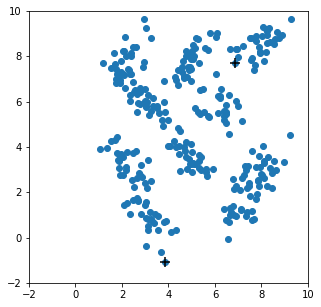

Starting k means algo


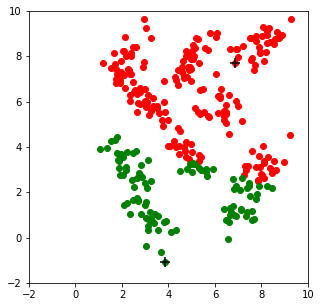

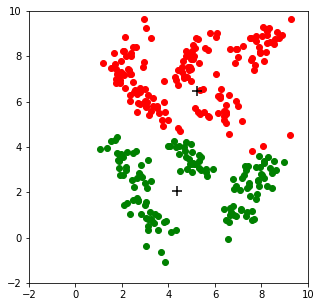

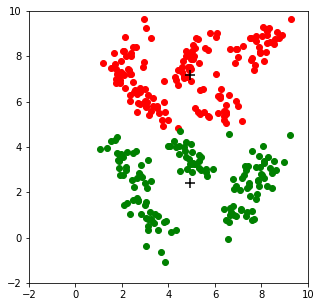

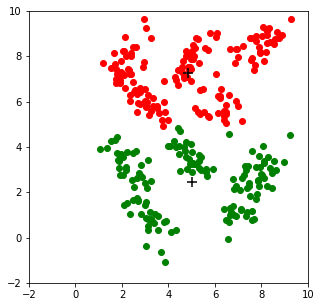

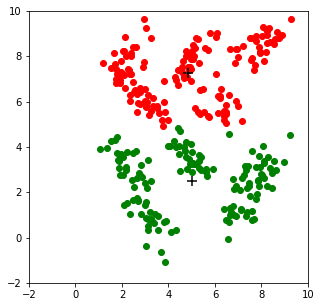

Sum of Clusters as whole 1921.033485856206
[1921.033485856206]
[[ 5.32508246  7.68399917]
 [ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]]
Initial Graph for k =  3


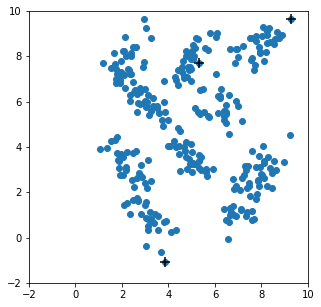

Starting k means algo


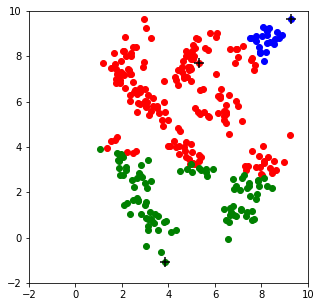

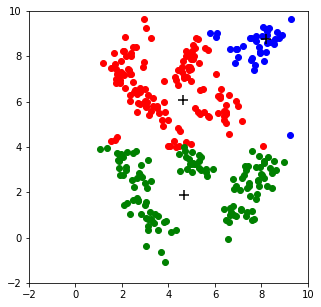

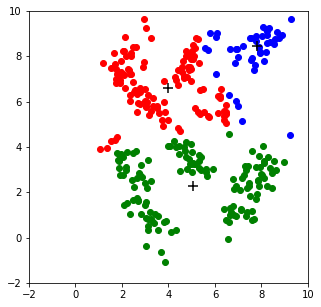

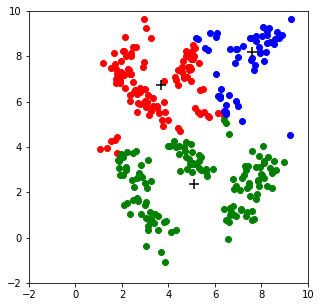

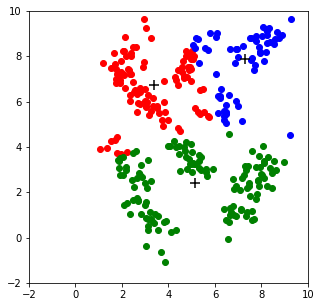

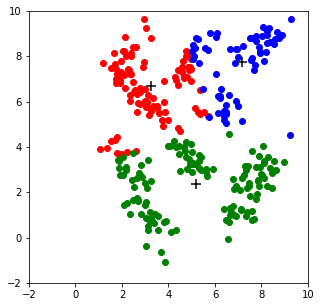

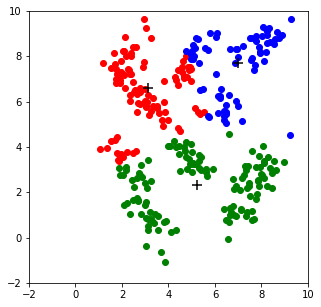

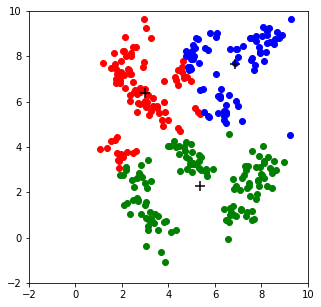

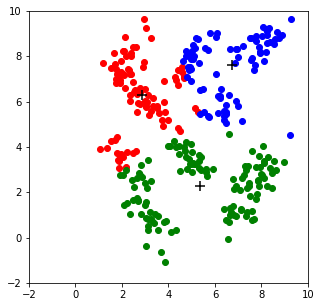

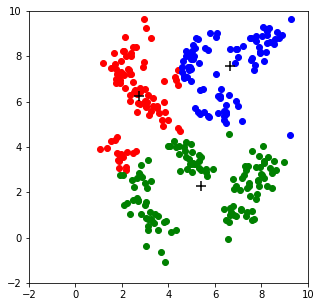

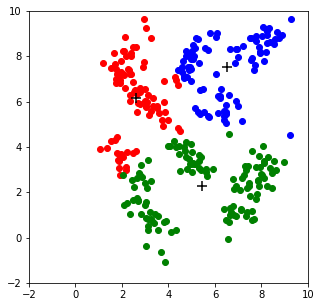

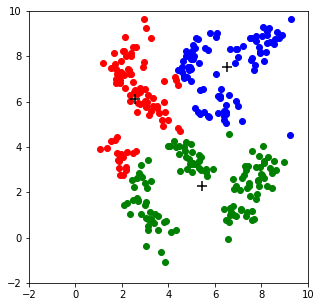

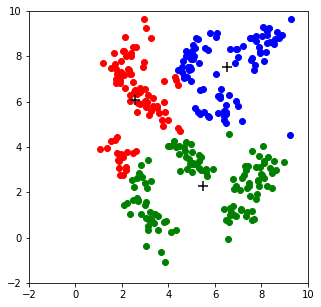

Sum of Clusters as whole 1293.777452391135
[1921.033485856206, 1293.777452391135]
[[ 5.2979492   3.65258141]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]]
Initial Graph for k =  4


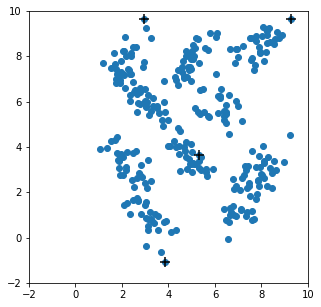

Starting k means algo


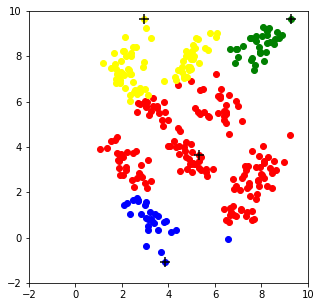

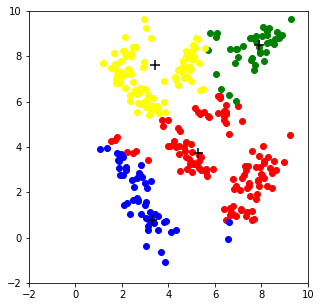

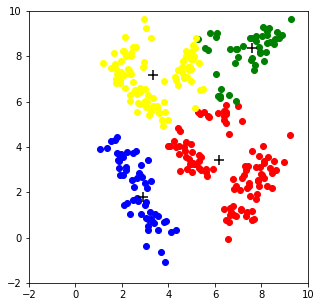

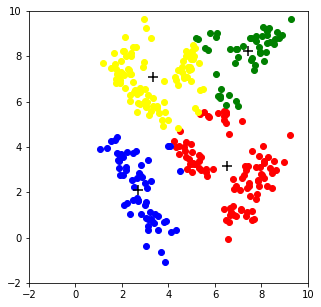

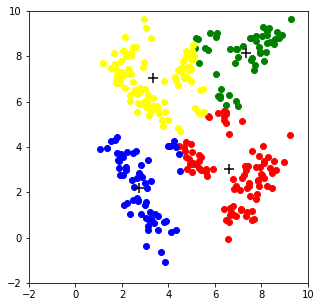

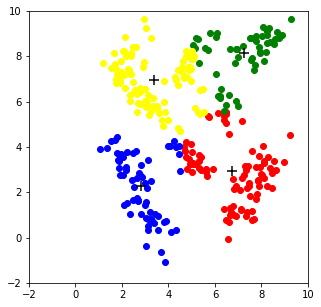

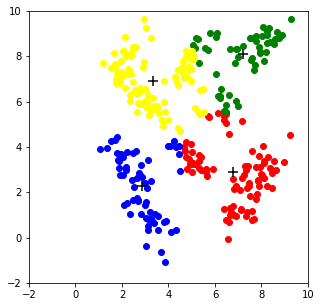

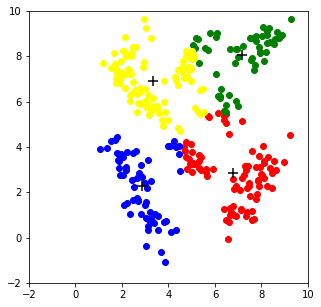

Sum of Clusters as whole 805.116645747261
[1921.033485856206, 1293.777452391135, 805.116645747261]
[[ 6.60277235  6.31081582]
 [ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]
 [ 6.5807212  -0.0766824 ]]
Initial Graph for k =  5


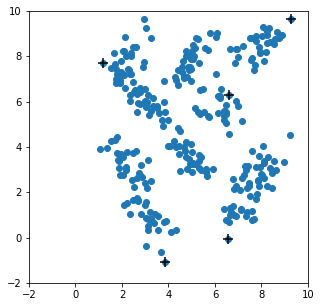

Starting k means algo


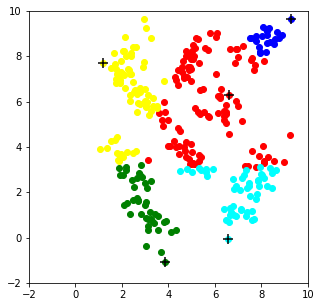

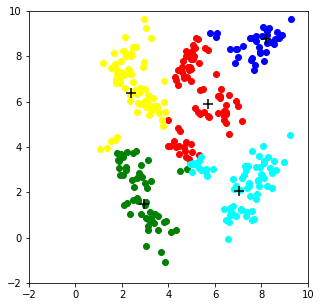

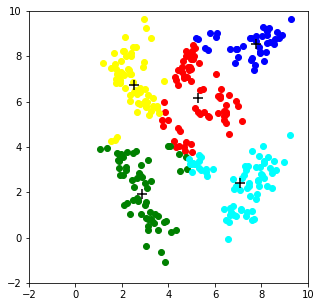

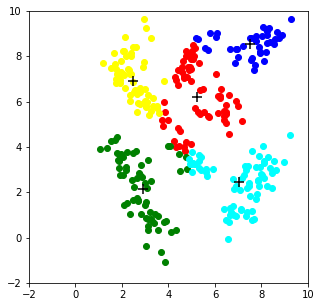

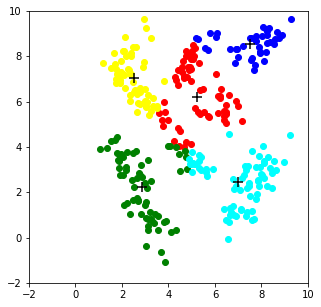

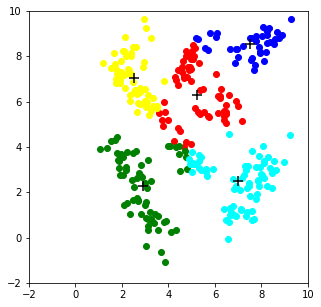

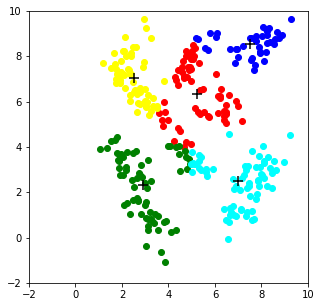

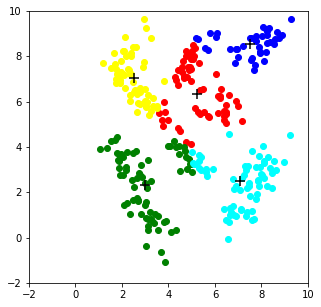

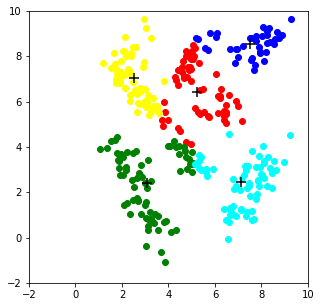

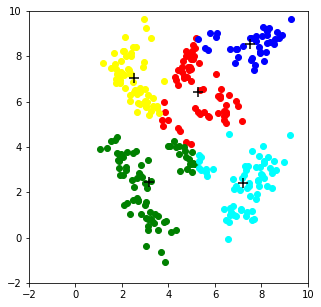

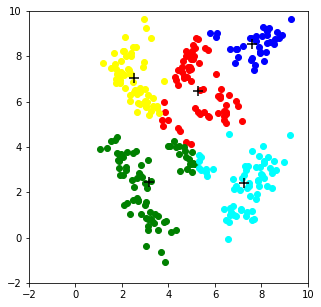

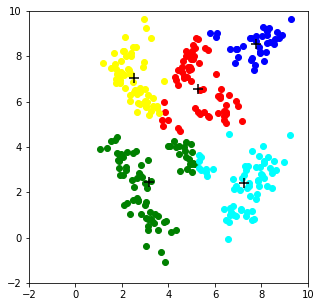

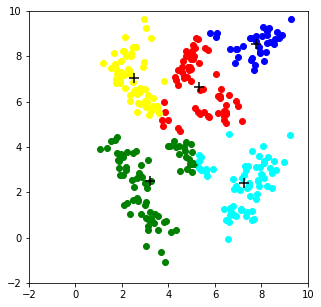

Sum of Clusters as whole 613.986628606663
[1921.033485856206, 1293.777452391135, 805.116645747261, 613.986628606663]
[[ 5.57009665  8.3870942 ]
 [ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.05217427  3.88943741]
 [ 7.68097556  0.83542043]
 [ 2.95297924  9.65073899]]
Initial Graph for k =  6


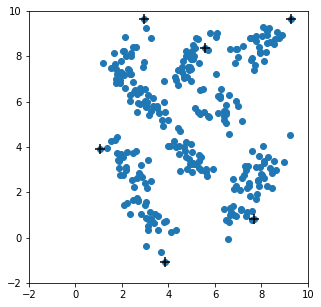

Starting k means algo


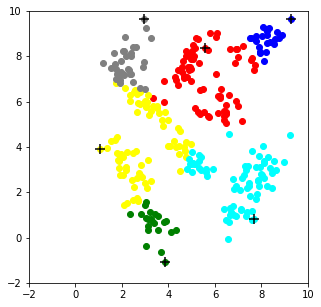

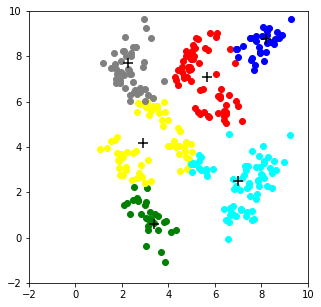

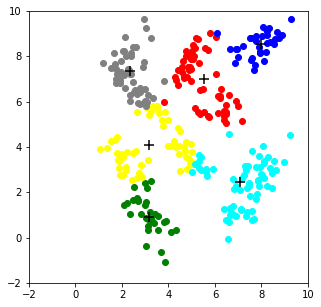

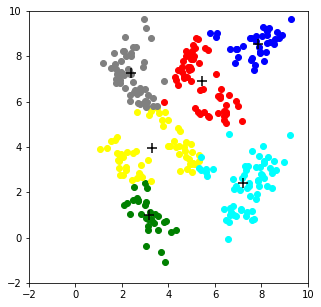

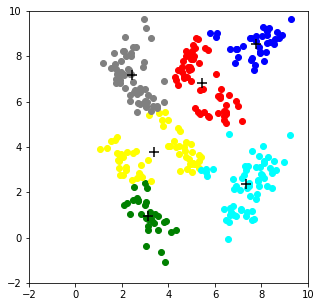

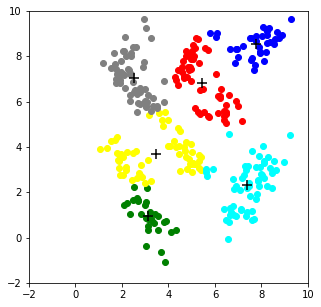

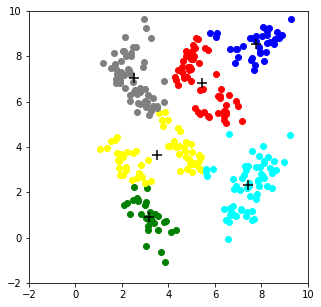

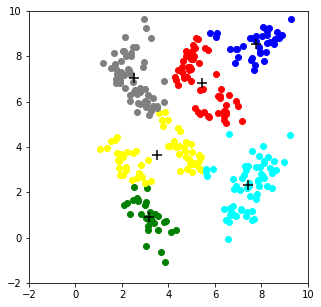

Sum of Clusters as whole 476.2965705269665
[1921.033485856206, 1293.777452391135, 805.116645747261, 613.986628606663, 476.2965705269665]
[[ 4.97304553  7.4290438 ]
 [ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 1.20162248  7.68639714]
 [ 6.5807212  -0.0766824 ]
 [ 8.87578072  8.96092361]
 [ 3.04101702 -0.36138487]]
Initial Graph for k =  7


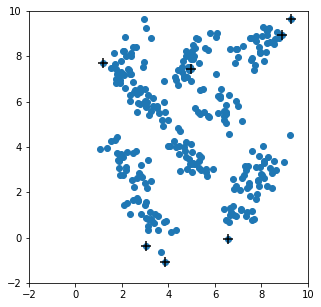

Starting k means algo


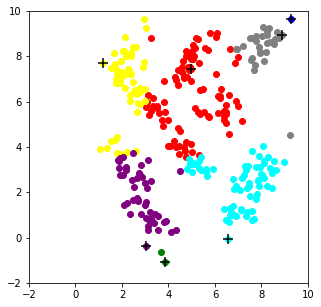

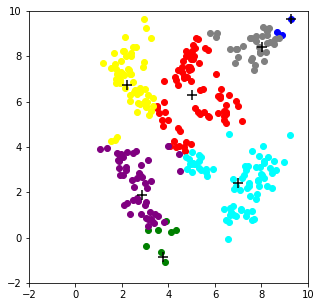

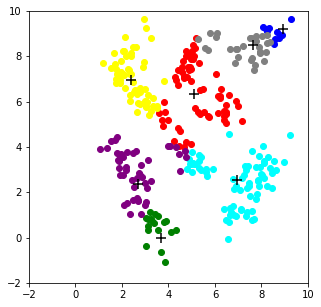

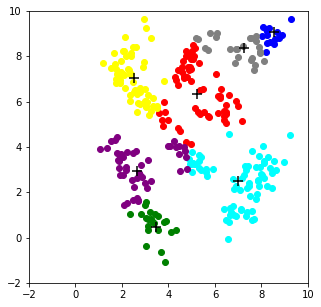

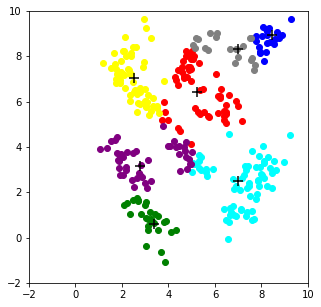

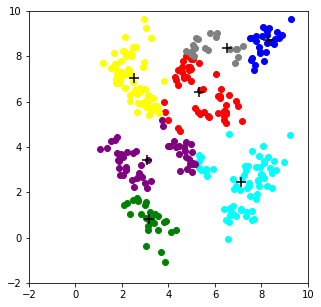

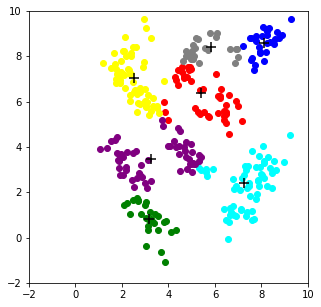

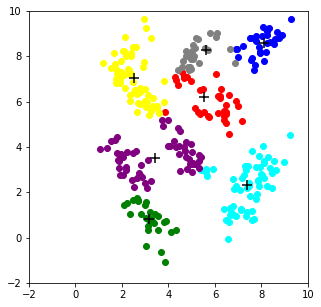

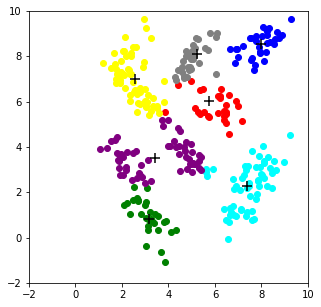

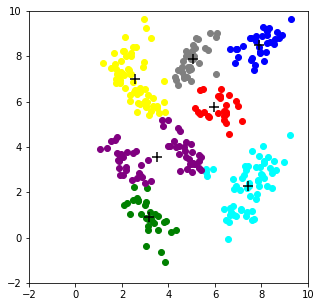

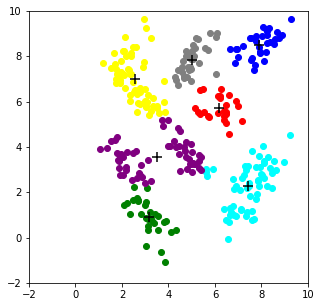

Sum of Clusters as whole 397.4481224441368
[1921.033485856206, 1293.777452391135, 805.116645747261, 613.986628606663, 476.2965705269665, 397.4481224441368]
[[ 8.09209017  3.39065059]
 [ 1.20162248  7.68639714]
 [ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 2.95297924  9.65073899]
 [ 3.04101702 -0.36138487]
 [ 8.87578072  8.96092361]
 [ 6.5807212  -0.0766824 ]]
Initial Graph for k =  8


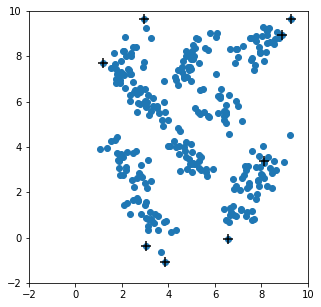

Starting k means algo


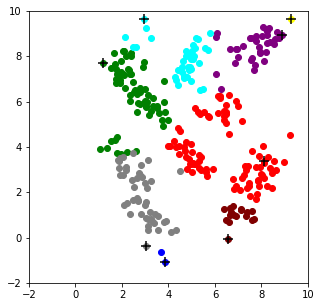

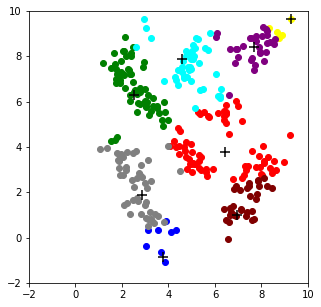

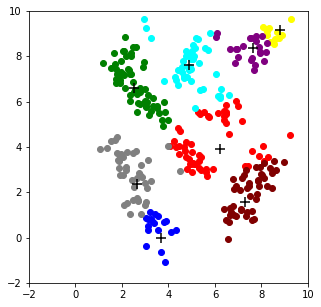

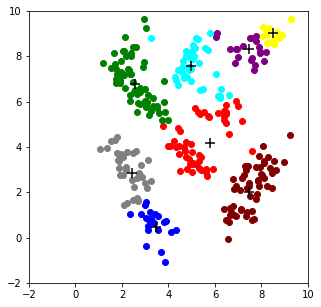

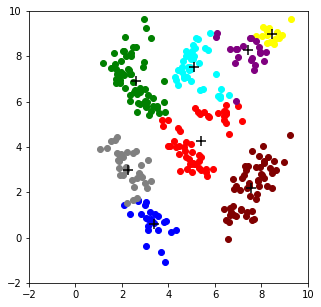

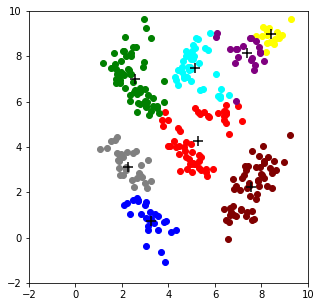

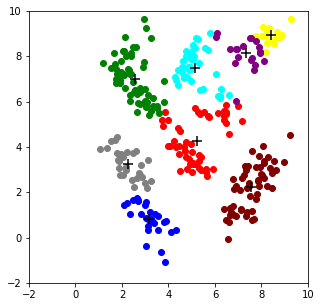

Sum of Clusters as whole 349.7340457674297
[1921.033485856206, 1293.777452391135, 805.116645747261, 613.986628606663, 476.2965705269665, 397.4481224441368, 349.7340457674297]
[[ 1.92561853  2.73857632]
 [ 9.26998864  9.62492869]
 [ 3.85212146 -1.08715226]
 [ 2.95297924  9.65073899]
 [ 7.68097556  0.83542043]
 [ 8.87578072  8.96092361]
 [ 1.20162248  7.68639714]
 [ 3.04101702 -0.36138487]
 [ 8.67805277  9.08757916]]
Initial Graph for k =  9


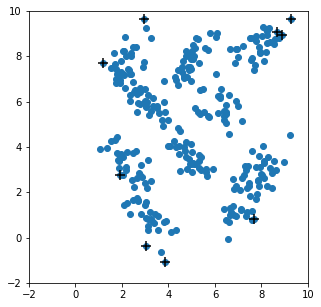

Starting k means algo


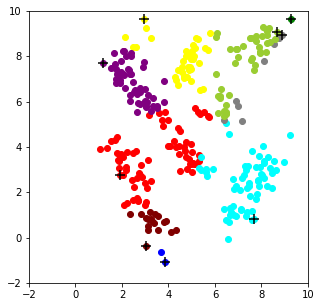

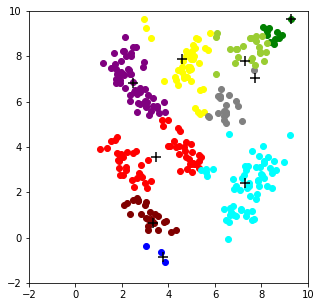

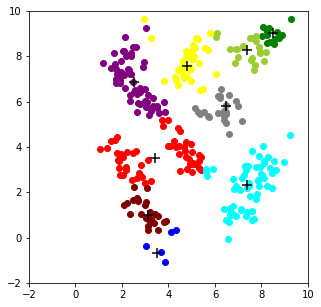

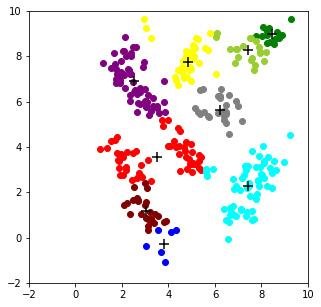

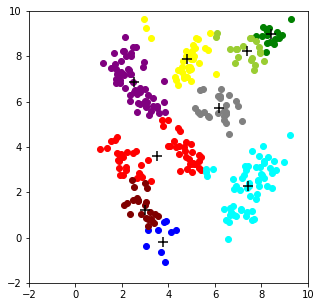

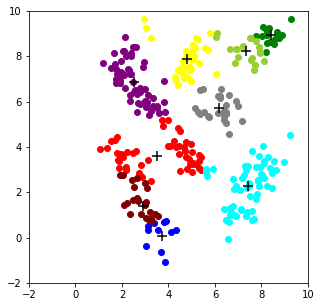

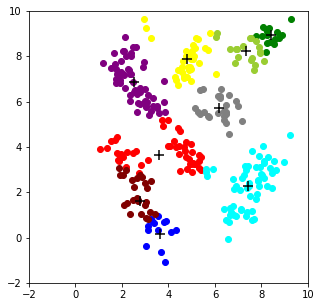

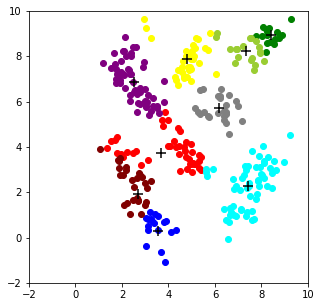

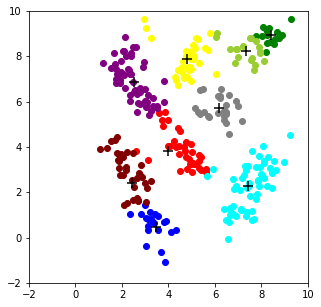

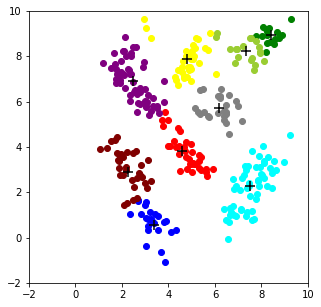

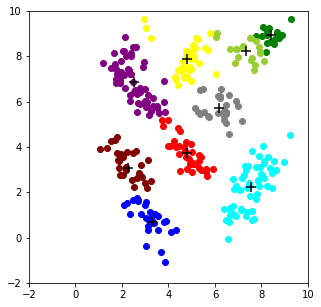

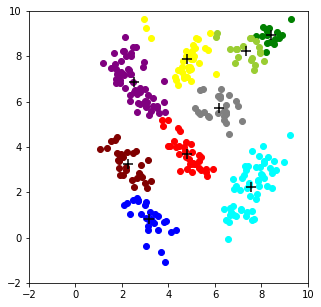

Sum of Clusters as whole 277.39143397662207
[1921.033485856206, 1293.777452391135, 805.116645747261, 613.986628606663, 476.2965705269665, 397.4481224441368, 349.7340457674297, 277.39143397662207]
[[ 3.81485895  6.91844078]
 [ 3.85212146 -1.08715226]
 [ 9.26998864  9.62492869]
 [ 6.5807212  -0.0766824 ]
 [ 2.95297924  9.65073899]
 [ 3.04101702 -0.36138487]
 [ 8.87578072  8.96092361]
 [ 1.20162248  7.68639714]
 [ 7.68097556  0.83542043]
 [ 8.67805277  9.08757916]]
Initial Graph for k =  10


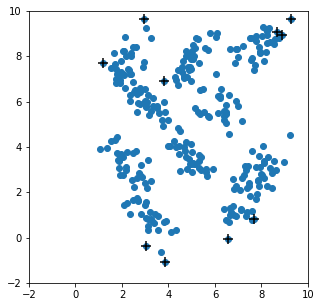

Starting k means algo


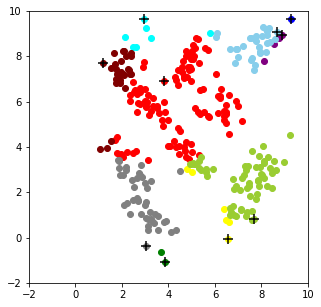

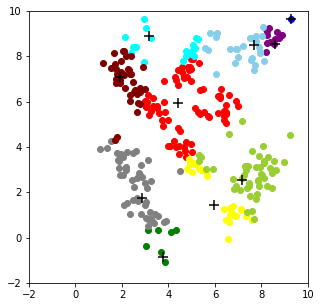

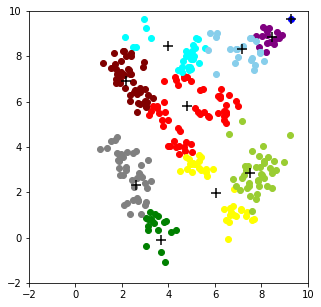

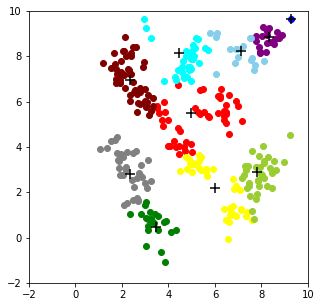

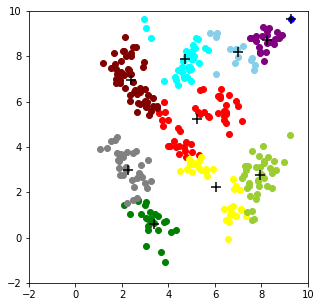

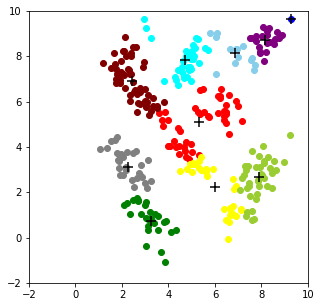

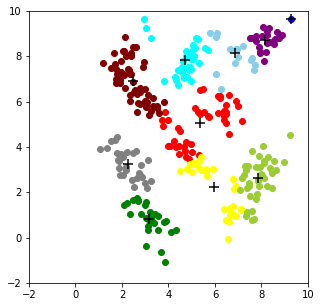

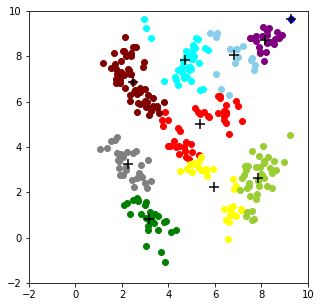

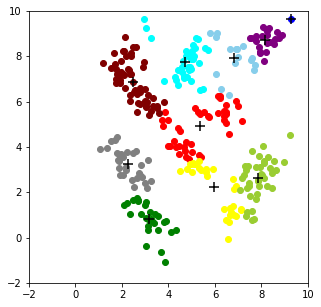

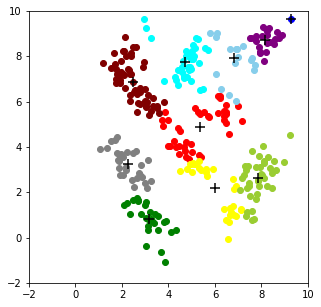

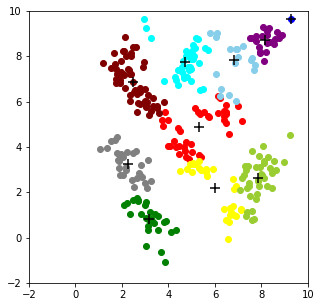

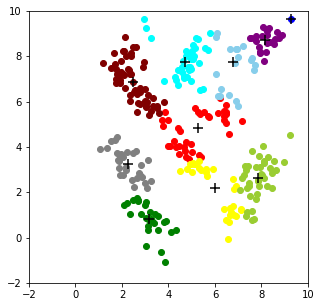

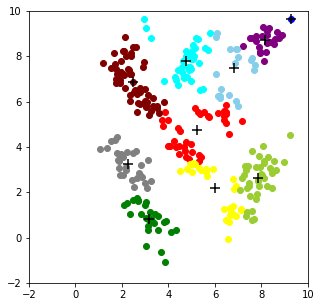

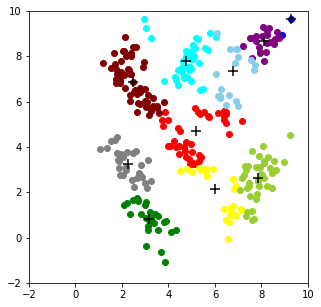

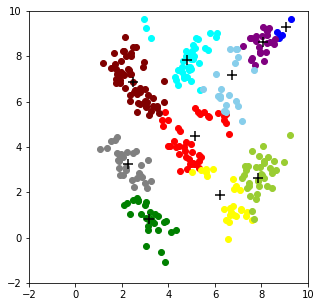

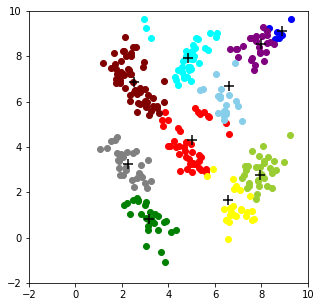

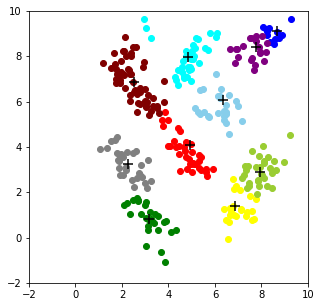

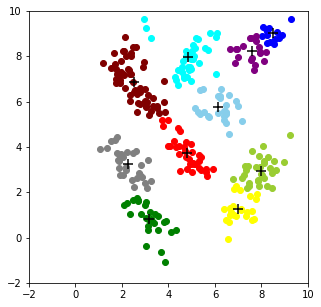

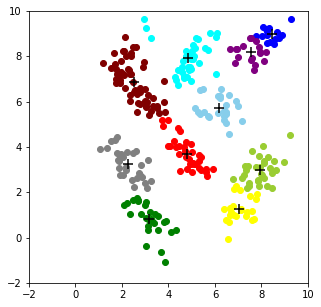

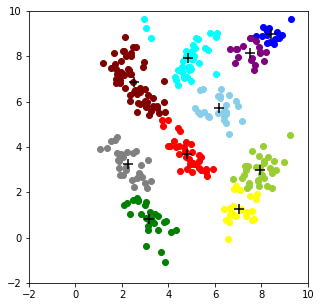

Sum of Clusters as whole 228.13364752821988
[1921.033485856206, 1293.777452391135, 805.116645747261, 613.986628606663, 476.2965705269665, 397.4481224441368, 349.7340457674297, 277.39143397662207, 228.13364752821988]


In [22]:
obj_plot = [] #Storing the values for objective function to plot against k @akd
for k in k_val:
    
    #centroids = initialize_centroids(k,a)
    centroids = initialize_centroids(k,a)
    print (centroids)
    
    x_centroid = centroids.take(0,axis=1).tolist()
    y_centroid = centroids.take(1, axis=1).tolist()
    
   #plot scatter graph for given data set with initial k                                                                                                                                                  @akd
    print ("Initial Graph for k = ",k)
    figure = plt.figure(figsize = (5,5))
    plt.scatter(x_cordinate, y_cordinate)
    plt.scatter(x_centroid, y_centroid, marker = '+', s = 100, color='black')
    plt.xlim(-2,10)
    plt.ylim(-2,10)
    plt.show()
    
    print ("Starting k means algo")

    condition = True
    C = np.zeros(len(a))

    while (condition):
                  
        D = []    
        for xy in a: #iterating over all data points

            ED = []
            for cent in centroids: #calculating all the ED among centroids and a particular point 
                ED.append(calEuclideanDist(xy[0],xy[1],cent[0],cent[1]))
            D.append(ED)

        D = np.asarray(D)

        x_centroid = centroids.take(0,axis=1).tolist()
        y_centroid = centroids.take(1,axis=1).tolist()

        #plot scatter graph
        figure1 = plt.figure(figsize = (5,5))
        C = np.argmin(D,axis=1)

        #Update old Centroid
        centroid_old = np.copy(centroids)

        for i in range(k):
            points = np.asarray([a[j] for j in range(len(a)) if C[j]==i])
            #print ("Cluster Number - ",i)
            #print (points)
            x_c = points.take(0,axis=1).tolist()
            y_c = points.take(1,axis=1).tolist()
            #print(color_map[i])
            plt.scatter(x_c, y_c, c=color_map[i])
            centroids[i] = np.mean(points,axis=0) # initialize new centroid@akd 
        plt.scatter(x_centroid, y_centroid, marker = '+', s=100 ,color = "black")
        plt.xlim(-2,10)
        plt.ylim(-2,10)
        plt.show()

       # print ("new Centroid")
       # print(centroids)
       # print ("Old Centroid")
       # print (centroid_old)
        condition1 = (np.array_equal(centroid_old, centroids))
        #print (condition1)

        if condition1:
            condition = False
            #print ("Will exit loop")
        else:
            condition = True
            #print ("Loop continues")
    
    #Calculating the objective function and store value to obj_plot to plot against k (Elbow Plot) - @akd                                                                                         @akd
    sum_of_clusters = 0
    for i in range(k):
        points = np.asarray([a[j] for j in range(len(a)) if C[j]==i])        
        val = calObjectiveFunction(points,centroids[i])
        sum_of_clusters += val
    print ("Sum of Clusters as whole",sum_of_clusters)
        
    obj_plot.append(sum_of_clusters)
    print (obj_plot)

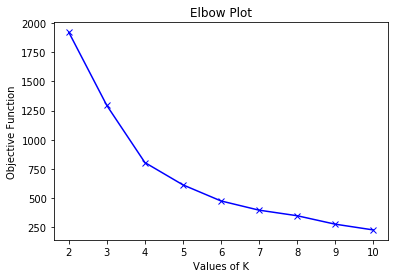

In [23]:
#Plot the Elbow Plot (X-> k, Y-> Objective Function) - @akd
plt.plot(k_val, obj_plot, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Objective Function') 
plt.title('Elbow Plot') 
plt.show()